In [35]:

import iris
import iris.analysis
import iris.analysis.cartography
import iris.quickplot as qp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [36]:
%%bash
ls  /gws/nopw/j04/cmip7/users/jmulcahy/CMIP7_GHG_test_data/ds318/

ds318a.py19801201.pp
ds318a.py19821201.pp
ds318a.py19851201.pp
ds318a.py19881201.pp
ds318a.py19911201.pp
ds318a.py19941201.pp
ds318a.py19961201.pp
ds318a.py19981201.pp
ds318a.py19991201.pp
ds318a.py20031201.pp
ds318a.py20041201.pp
ds318a.py20061201.pp


/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/iris/fileformats/rules.py:371: IrisUserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(


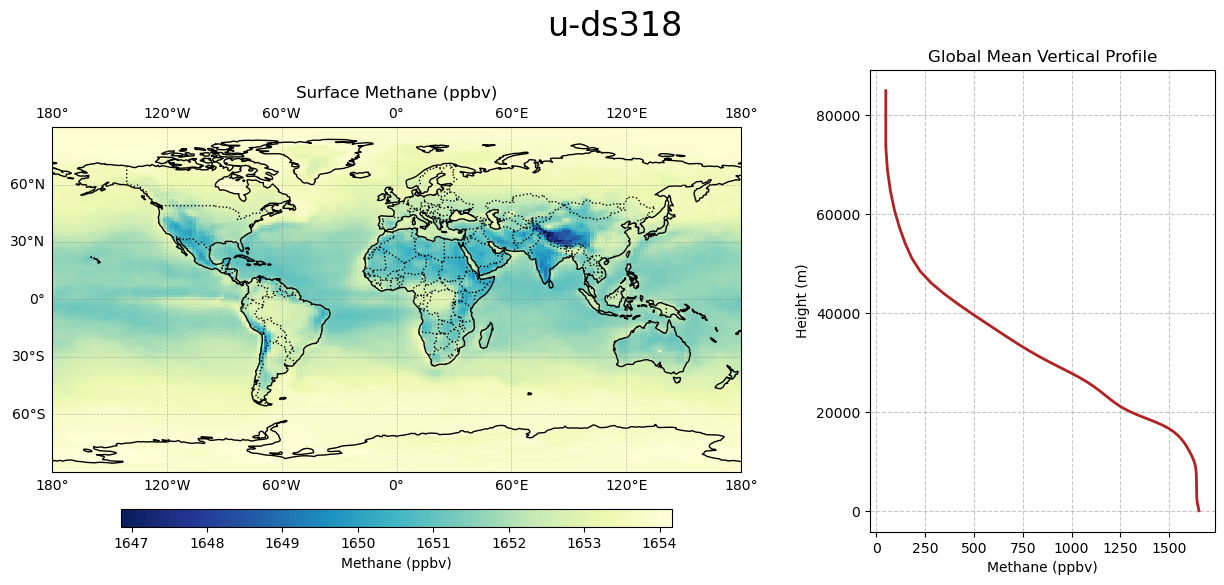

In [44]:

stash_constraint = iris.AttributeConstraint(STASH='m01s34i009')
filepath = '/gws/nopw/j04/cmip7/users/jmulcahy/CMIP7_GHG_test_data/ds318/ds318a.py19851201.pp'
ch4_pp = iris.load(filepath, stash_constraint)

if not ch4_pp:
    raise ValueError("Methane cube not found.")
ch4 = ch4_pp[0]

# 2. Conversion (kg/kg -> ppbv)
M_AIR, M_CH4 = 28.966, 16.043
CONVERSION_FACTOR = (M_AIR / M_CH4) * 1e9
ch4 = ch4 * CONVERSION_FACTOR

# 3. Data Prep
if ch4.ndim == 3:
    ch4_surface = ch4[0, :, :]
    
    # Vertical Profile Data
    ch4.coord('latitude').guess_bounds()
    ch4.coord('longitude').guess_bounds()
    grid_areas = iris.analysis.cartography.area_weights(ch4)
    ch4_profile = ch4.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=grid_areas)
else:
    ch4_surface = ch4
    ch4_profile = None

# --- PLOTTING ---
fig = plt.figure(figsize=(15, 6))

# GridSpec: wspace=0.25 adds more room between the plots to prevent overlap
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.25)

# === PLOT 1: Surface Map ===
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())

lons = ch4_surface.coord('longitude').points
lats = ch4_surface.coord('latitude').points
mesh = ax1.pcolormesh(lons, lats, ch4_surface.data, cmap='YlGnBu_r', transform=ccrs.PlateCarree())

ax1.add_feature(cfeature.COASTLINE, linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title('Surface Methane (ppbv)')

# Gridlines control: Disable right-side labels to further reduce clutter
gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False  # Turns off labels on the right edge (touching the other plot)
gl.top_labels = True     # Keep top labels if desired

# Colorbar (Compact and centered)
cbar = plt.colorbar(mesh, ax=ax1, orientation='horizontal', 
                    fraction=0.05, pad=0.08, shrink=0.8, aspect=30)
cbar.set_label('Methane (ppbv)')

# === PLOT 2: Vertical Profile ===
if ch4_profile is not None:
    ax2 = fig.add_subplot(gs[1])
    
    y_data = ch4_profile.coord('level_height').points
    x_data = ch4_profile.data
    
    ax2.plot(x_data, y_data, color='firebrick', lw=2)
    ax2.set_title('Global Mean Vertical Profile')
    ax2.set_xlabel('Methane (ppbv)')
    ax2.set_ylabel('Height (m)')
    ax2.grid(True, linestyle='--', alpha=0.7)


plt.suptitle('u-ds318', fontsize=24)
plt.show()

/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/iris/fileformats/rules.py:371: IrisUserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(


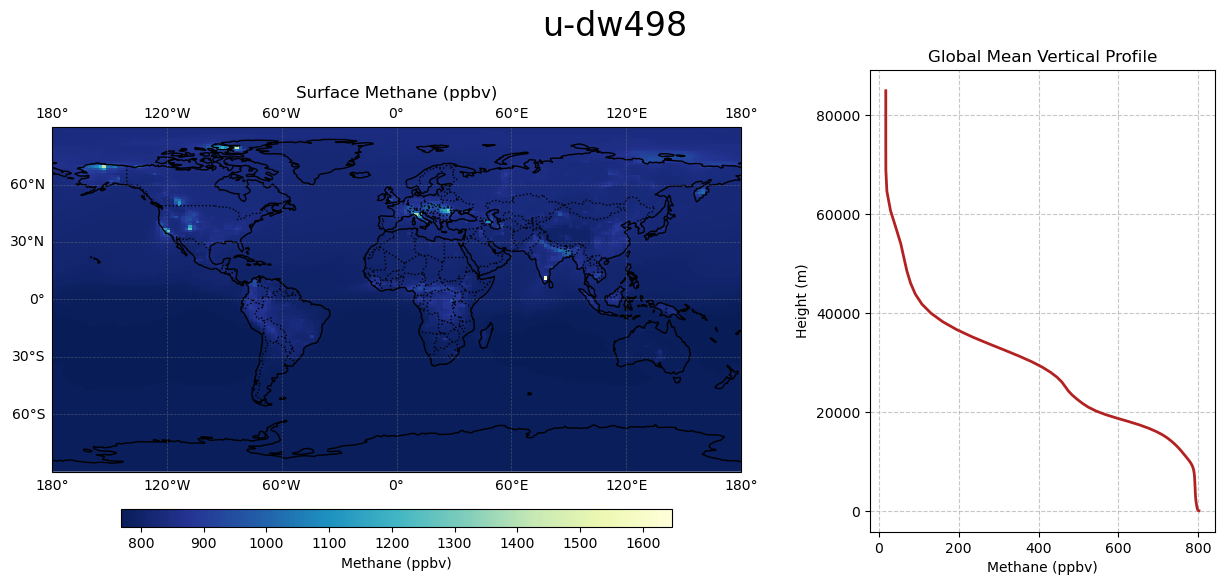

In [51]:
# 1. Load Data
stash_constraint = iris.AttributeConstraint(STASH='m01s34i009')
filepath = '/gws/nopw/j04/cmip7/users/jmulcahy/CMIP7_GHG_test_data/dw498/dw498a.p51850dec.pp'
ch4_pp = iris.load(filepath, stash_constraint)

if not ch4_pp:
    raise ValueError("Methane cube not found.")
ch4 = ch4_pp[0]

# 2. Conversion (kg/kg -> ppbv)
M_AIR, M_CH4 = 28.966, 16.043
CONVERSION_FACTOR = (M_AIR / M_CH4) * 1e9
ch4 = ch4 * CONVERSION_FACTOR

# 3. Data Prep
if ch4.ndim == 3:
    ch4_surface = ch4[0, :, :]
    
    # Vertical Profile Data
    ch4.coord('latitude').guess_bounds()
    ch4.coord('longitude').guess_bounds()
    grid_areas = iris.analysis.cartography.area_weights(ch4)
    ch4_profile = ch4.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=grid_areas)
else:
    ch4_surface = ch4
    ch4_profile = None

fig = plt.figure(figsize=(15, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.25)

# === PLOT 1: Surface Map ===
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())

lons = ch4_surface.coord('longitude').points
lats = ch4_surface.coord('latitude').points
mesh = ax1.pcolormesh(lons, lats, ch4_surface.data, cmap='YlGnBu_r', transform=ccrs.PlateCarree())

ax1.add_feature(cfeature.COASTLINE, linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title('Surface Methane (ppbv)')

gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False  # Turns off labels on the right edge (touching the other plot)
gl.top_labels = True     # Keep top labels if desired

cbar = plt.colorbar(mesh, ax=ax1, orientation='horizontal', 
                    fraction=0.05, pad=0.08, shrink=0.8, aspect=30)
cbar.set_label('Methane (ppbv)')

if ch4_profile is not None:
    ax2 = fig.add_subplot(gs[1])
    
    y_data = ch4_profile.coord('level_height').points
    x_data = ch4_profile.data
    
    ax2.plot(x_data, y_data, color='firebrick', lw=2)
    ax2.set_title('Global Mean Vertical Profile')
    ax2.set_xlabel('Methane (ppbv)')
    ax2.set_ylabel('Height (m)')
    ax2.grid(True, linestyle='--', alpha=0.7)


plt.suptitle('u-dw498', fontsize=24)
plt.show()

/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/iris/fileformats/rules.py:371: IrisUserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(


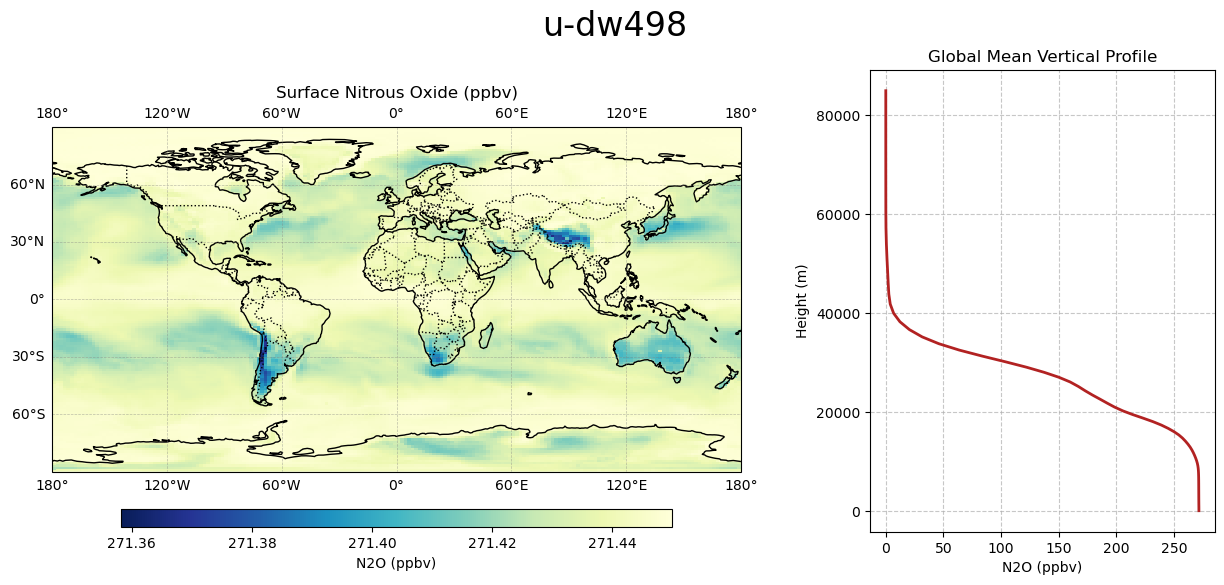

In [52]:
# 1. Load Data
# STASH m01s34i049 corresponds to Mass Fraction of N2O
stash_constraint = iris.AttributeConstraint(STASH='m01s34i049')
filepath = '/gws/nopw/j04/cmip7/users/jmulcahy/CMIP7_GHG_test_data/dw498/dw498a.p51850dec.pp'

n2o_pp = iris.load(filepath, stash_constraint)

if not n2o_pp:
    raise ValueError("N2O cube not found in file.")
n2o = n2o_pp[0]

M_AIR = 28.966
M_N2O = 44.013 
CONVERSION_FACTOR = (M_AIR / M_N2O) * 1e9

n2o = n2o * CONVERSION_FACTOR
if n2o.ndim == 3:
    n2o_surface = n2o[0, :, :]
    n2o.coord('latitude').guess_bounds()
    n2o.coord('longitude').guess_bounds()
    grid_areas = iris.analysis.cartography.area_weights(n2o)
    n2o_profile = n2o.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=grid_areas)
else:
    n2o_surface = n2o
    n2o_profile = None

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.25)

# === PLOT 1: Surface Map ===
ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())

lons = n2o_surface.coord('longitude').points
lats = n2o_surface.coord('latitude').points
mesh = ax1.pcolormesh(lons, lats, n2o_surface.data, cmap='YlGnBu_r', transform=ccrs.PlateCarree())

ax1.add_feature(cfeature.COASTLINE, linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title('Surface Nitrous Oxide (ppbv)')

gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False  # Turns off labels on the right edge
gl.top_labels = True     

cbar = plt.colorbar(mesh, ax=ax1, orientation='horizontal', 
                    fraction=0.05, pad=0.08, shrink=0.8, aspect=30)
cbar.set_label('N2O (ppbv)')

# === PLOT 2: Vertical Profile ===
if n2o_profile is not None:
    ax2 = fig.add_subplot(gs[1])
    
    y_data = n2o_profile.coord('level_height').points
    x_data = n2o_profile.data
    
    ax2.plot(x_data, y_data, color='firebrick', lw=2)
    ax2.set_title('Global Mean Vertical Profile')
    ax2.set_xlabel('N2O (ppbv)')
    ax2.set_ylabel('Height (m)')
    ax2.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('u-dw498', fontsize=24)
plt.show()

/apps/jasmin/jaspy/miniforge_envs/jaspy3.12/mf3-25.3.0-3/envs/jaspy3.12-mf3-25.3.0-3-v20250704/lib/python3.12/site-packages/iris/fileformats/rules.py:371: IrisUserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(


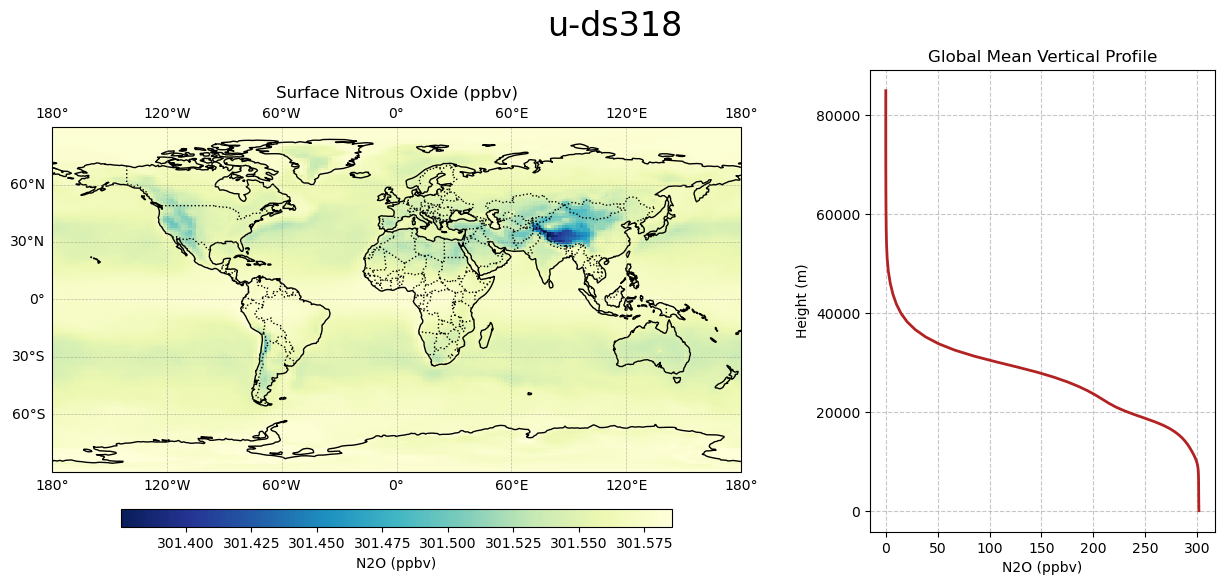

In [55]:
stash_constraint = iris.AttributeConstraint(STASH='m01s34i049')
filepath = '/gws/nopw/j04/cmip7/users/jmulcahy/CMIP7_GHG_test_data/ds318/ds318a.py19801201.pp'

n2o_pp = iris.load(filepath, stash_constraint)

if not n2o_pp:
    raise ValueError("N2O cube not found in file.")
n2o = n2o_pp[0]

M_AIR = 28.966
M_N2O = 44.013 
CONVERSION_FACTOR = (M_AIR / M_N2O) * 1e9

n2o = n2o * CONVERSION_FACTOR
if n2o.ndim == 3:
    n2o_surface = n2o[0, :, :]
    
    n2o.coord('latitude').guess_bounds()
    n2o.coord('longitude').guess_bounds()
    grid_areas = iris.analysis.cartography.area_weights(n2o)
    n2o_profile = n2o.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=grid_areas)
else:
    n2o_surface = n2o
    n2o_profile = None

fig = plt.figure(figsize=(15, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.25)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree())

lons = n2o_surface.coord('longitude').points
lats = n2o_surface.coord('latitude').points
mesh = ax1.pcolormesh(lons, lats, n2o_surface.data, cmap='YlGnBu_r', transform=ccrs.PlateCarree())

ax1.add_feature(cfeature.COASTLINE, linewidth=1)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title('Surface Nitrous Oxide (ppbv)')

gl = ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.right_labels = False  # Turns off labels on the right edge
gl.top_labels = True     

cbar = plt.colorbar(mesh, ax=ax1, orientation='horizontal', 
                    fraction=0.05, pad=0.08, shrink=0.8, aspect=30)
cbar.set_label('N2O (ppbv)')

if n2o_profile is not None:
    ax2 = fig.add_subplot(gs[1])
    
    y_data = n2o_profile.coord('level_height').points
    x_data = n2o_profile.data
    
    ax2.plot(x_data, y_data, color='firebrick', lw=2)
    ax2.set_title('Global Mean Vertical Profile')
    ax2.set_xlabel('N2O (ppbv)')
    ax2.set_ylabel('Height (m)')
    ax2.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('u-ds318', fontsize=24)
plt.show()